In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [32]:
df = pd.read_csv("GSE157743_TPM.single_cell_RNA_Seq.csv", header = None)
df.head()

/Users/sihonghe/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,NaN,Mel201,Mel201_2,PEM58_4,PEM62_2,Mel194_2,PEM52_3,Mel188_2,Mel203_3,Mel232_1,...,Mel182_L1_8,Mel182_L2_9_2,Mel167_1,Mel167_2,WBC1_donor1,WBC2_donor1,WBC3_donor1,WBC4_donor1,WBC5_donor1,WBC6_donor1
1,OR4F5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.73959,0,0,0.69982
2,OR4F29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.850344,0,0.621514,0.684169
3,OR4F16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.258688,0.840141,0.850344,1.37573,1.86454,2.73668
4,SAMD11,0,0,103.525,0,0,0,0,0.190666,0,...,0,0,0,0,0.280899,0.342104,0.461678,0.373464,0.506159,0.557186


In [33]:
len(df)

19272

In [34]:
lable = ["lable"] + [1] * (102 -6) + [0] * 6

In [43]:
common_name = pd.read_csv("common_name.csv").iloc[:,-1:]

In [48]:
common_list = common_name['0'].values.tolist()

In [66]:
df = df.loc[df.iloc[:, 0].isin(common_list)]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
4,SAMD11,0,0,103.525,0,0,0,0,0.190666,0,...,0,0,0,0,0.280899,0.342104,0.461678,0.373464,0.506159,0.557186
5,NOC2L,0,0,0,1.67733,0,0,0,224.681,0,...,44.706,96.4068,0,0,0.276765,0.299617,1.21302,1.22656,4.43298,2.43993
6,KLHL17,0,0,0,0,0.340253,0,0,0,0,...,21.4544,0.236396,0,0.142209,0,0.406645,1.09756,0.665883,1.2033,0.662304
7,PLEKHN1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.094886,1.69489,0.623807,1.76615,1.36782,2.25856
8,PERM1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.074672,0.485024,0.245457,0.595672,0.538212,0.59247


In [68]:
new_data = pd.DataFrame(lable).T.append(df)

In [70]:
new_data.to_csv("sihong_data.csv")

In [74]:
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,lable,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
4,SAMD11,0,0,103.525,0,0,0,0,0.190666,0,...,0,0,0,0,0.280899,0.342104,0.461678,0.373464,0.506159,0.557186
5,NOC2L,0,0,0,1.67733,0,0,0,224.681,0,...,44.706,96.4068,0,0,0.276765,0.299617,1.21302,1.22656,4.43298,2.43993
6,KLHL17,0,0,0,0,0.340253,0,0,0,0,...,21.4544,0.236396,0,0.142209,0,0.406645,1.09756,0.665883,1.2033,0.662304
7,PLEKHN1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.094886,1.69489,0.623807,1.76615,1.36782,2.25856


In [132]:
col = [i for i in range(2,104,1)]
print(col)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103]


In [166]:
ndf = pd.read_csv("sihong_data.csv")

In [168]:
ndf

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,100,101,102
0,0,lable,1.0,1.0,1.000,1.00000,1.000000,1.0,1.0,1.000000,...,1.0000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4,SAMD11,0.0,0.0,103.525,0.00000,0.000000,0.0,0.0,0.190666,...,0.0000,0.000000,0.00000,0.000000,0.280899,0.342104,0.461678,0.373464,0.506159,0.557186
2,5,NOC2L,0.0,0.0,0.000,1.67733,0.000000,0.0,0.0,224.681000,...,44.7060,96.406800,0.00000,0.000000,0.276765,0.299617,1.213020,1.226560,4.432980,2.439930
3,6,KLHL17,0.0,0.0,0.000,0.00000,0.340253,0.0,0.0,0.000000,...,21.4544,0.236396,0.00000,0.142209,0.000000,0.406645,1.097560,0.665883,1.203300,0.662304
4,7,PLEKHN1,0.0,0.0,0.000,0.00000,0.000000,0.0,0.0,0.000000,...,0.0000,0.000000,0.00000,0.000000,0.094886,1.694890,0.623807,1.766150,1.367820,2.258560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15704,19233,NLGN4Y,0.0,0.0,0.000,1.07639,0.603300,0.0,0.0,0.000000,...,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078288
15705,19238,KDM5D,0.0,0.0,0.000,0.00000,0.000000,0.0,0.0,33.797000,...,0.0000,0.000000,0.00000,17.425200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15706,19239,EIF1AY,0.0,0.0,0.000,20.59690,0.000000,0.0,0.0,1.618840,...,0.0000,0.000000,1.54367,51.804900,0.298119,0.580922,0.783969,0.317087,0.859502,0.788457
15707,19240,RPS4Y2,0.0,0.0,0.000,0.00000,1.250170,0.0,0.0,0.000000,...,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [190]:
ndf.iloc[1:15709, 2:104].T

,1,2,3,4,5,6,7,8,9,10,...,15699,15700,15701,15702,15703,15704,15705,15706,15707,15708
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.763170,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,95.1399,0.000000,0.0,0.000000,0.00000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0,0.000000,0.00000,0.0
3,103.525000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0,0.000000,0.00000,0.0
4,0.000000,1.677330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.786047,0.0000,387.775000,0.0000,1.076390,0.0,20.596900,0.00000,0.0
5,0.000000,0.000000,0.340253,0.000000,0.000000,0.000000,0.000000,0.521811,0.000000,0.422683,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.603300,0.0,0.000000,1.25017,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.342104,0.299617,0.406645,1.694890,0.485024,0.379275,0.870742,1.143320,0.829539,1.094510,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0,0.580922,0.00000,0.0
99,0.461678,1.213020,1.097560,0.623807,0.245457,0.767762,0.881317,0.841605,0.419807,0.852159,...,0.663459,0.000000,0.0000,0.000000,0.0000,0.000000,0.0,0.783969,0.00000,0.0
100,0.373464,1.226560,0.665883,1.766150,0.595672,0.000000,0.000000,0.680798,0.339593,0.413601,...,0.000000,0.000000,38.3852,0.000000,0.0000,0.000000,0.0,0.317087,0.00000,0.0
101,0.506159,4.432980,1.203300,1.367820,0.538212,6.172710,16.103800,1.307140,0.920507,1.993090,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0,0.859502,0.00000,0.0


In [254]:
ndf.iloc[0:1, 2:104].T

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,101,102
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
data = ndf.iloc[1:15709, 2:104].T

In [217]:
X = np.array(data)

In [218]:
X

array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [103.525   ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [  0.373464,   1.22656 ,   0.665883, ...,   0.317087,   0.      ,
          0.      ],
       [  0.506159,   4.43298 ,   1.2033  , ...,   0.859502,   0.      ,
          0.      ],
       [  0.557186,   2.43993 ,   0.662304, ...,   0.788457,   0.      ,
          0.      ]])

In [194]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_predic = clusterer.fit_predict(X)
centers = clusterer.cluster_centers_

In [195]:
cluster_predic.sum()

12

In [196]:
cluster_predic

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
clusterer = GaussianMixture(n_components=2, random_state=10)
cluster_predic = clusterer.fit_predict(X)
centers = clusterer.means_

In [ ]:
cluster_predic.sum()

In [ ]:
cluster_predic

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [225]:
train_data = X
train = StandardScaler().fit_transform(train_data)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(train)

In [226]:
l = [1] * (102 - 6) + [0] * 6
len(l)

102

In [244]:
pd.DataFrame(l).T

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0


In [228]:
len(pca_res[:,0])

102

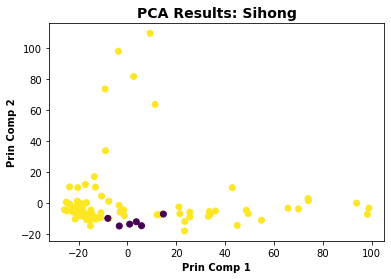

In [275]:
plt.scatter(pca_res[:,0],pca_res[:,1],c = l)
plt.title('PCA Results: Sihong', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [277]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_predic = clusterer.fit_predict(pca_res)
centers = clusterer.cluster_centers_

In [286]:
def GetCluster(X, random_seed = 10, cluster_n_range = [2,3,4], method = 'KMeans', show = True):
    score = []
    for n in cluster_n_range:
        if method == 'KMeans':
            clusterer = KMeans(n_clusters=n, random_state=random_seed)
            cluster_predic = clusterer.fit_predict(X)
            centers = clusterer.cluster_centers_
        else:
            clusterer = GaussianMixture(n_components=n, random_state=random_seed)
            cluster_predic = clusterer.fit_predict(X)
            centers = clusterer.means_
        silhouette_avg = silhouette_score(X, cluster_predic)
        score.append(silhouette_avg)

        if show:
            print("When #clusters = ", n, " ,the average sihouette_score = ", silhouette_avg)
            fig, (ax) = plt.subplots(1, 1)
            col = cm.nipy_spectral(cluster_predic.astype(float) / n)
            ax.scatter(X[:,0], X[:,1], marker = '.', c = col)
            ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
            for i, c in enumerate(centers):
                plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
            ax.set_title("The visualization of %s with numbers of clusters = %d, the average sihouette_score = %f" % (method,n,silhouette_avg))
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            plt.show()
        else: 
            return score

When #clusters =  2  ,the average sihouette_score =  0.6367247472487854


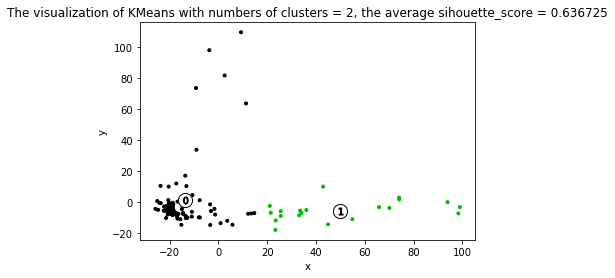

When #clusters =  3  ,the average sihouette_score =  0.712381823410145


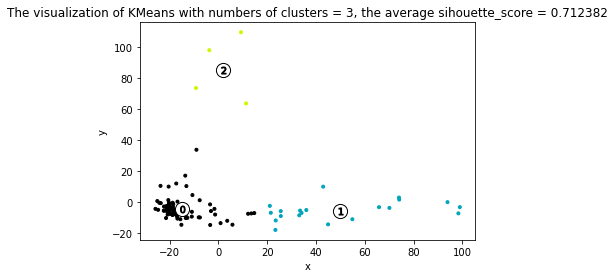

When #clusters =  4  ,the average sihouette_score =  0.6941736478883235


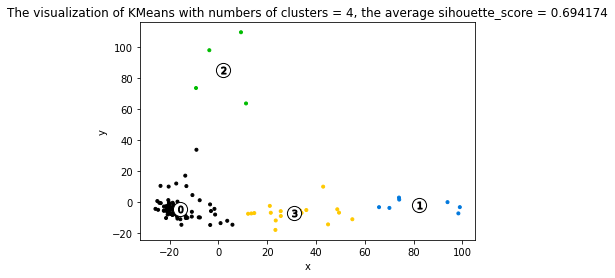

In [280]:
GetCluster(pca_res)

When #clusters =  2  ,the average sihouette_score =  0.38635955149209555


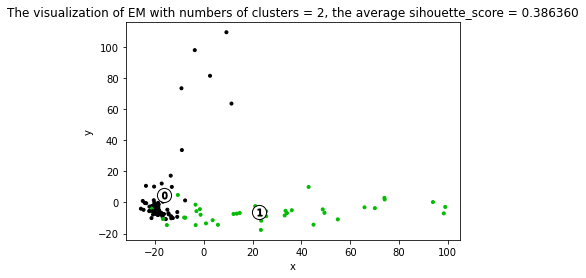

When #clusters =  3  ,the average sihouette_score =  0.37842247951994784


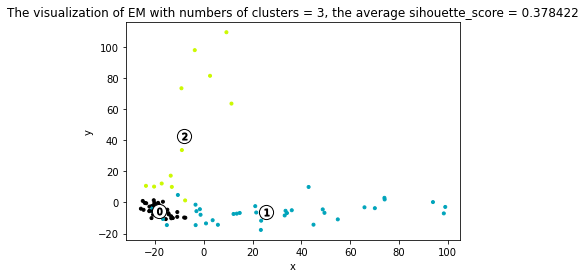

When #clusters =  4  ,the average sihouette_score =  0.37923339200285633


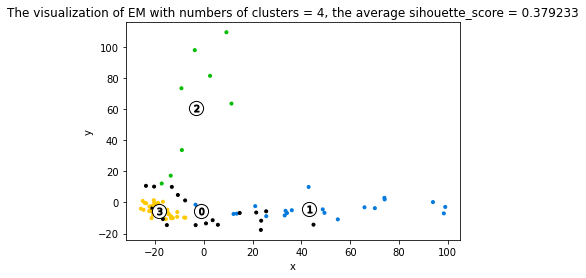

In [287]:
GetCluster(pca_res, method = "EM")